# An Integrated Diagnostic Analysis of Plasma Waves

Year 4 MSci project

### Fourier Transforms

```matplotlib``` example plotting sin(x) from -10 to 10 for some frequnecy, here changed by changing number of points. Some customisation of the graph's appearance is applied.

Text(0, 0.5, 'sin($x$)')

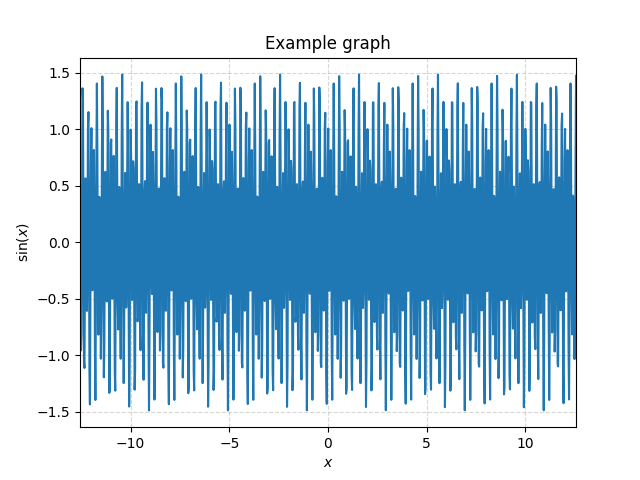

In [13]:
import matplotlib.pyplot as plt
import numpy as np

a=4
b=7
x = np.linspace(-4*np.pi,4*np.pi,1000)
y = np.sin(2*np.pi*a*x)/2 + np.cos(2*np.pi*b*x)

%matplotlib widget
plt.plot(x,y)
plt.grid(linestyle="--",alpha=0.5)
plt.xlim([-4*np.pi,4*np.pi])
plt.title("Example graph")
plt.xlabel("$x$")
plt.ylabel("sin($x$)")

Now let's perform a fast Fourier transform.

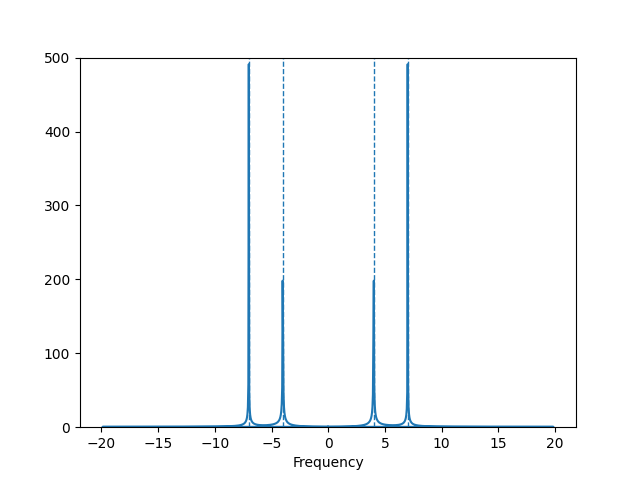

In [14]:
from scipy.fft import fft, fftfreq
%matplotlib widget
xf = fftfreq(len(x), 8*np.pi/1000)
yf = fft(y)
plt.plot(xf,np.abs(yf))
plt.ylim([0,500])
#plt.xlim([-1,1])
plt.xlabel("Frequency")
for i in [-a,a,-b,b]:
    plt.axvline(x = i, linestyle="--", linewidth=1)

### Illustrating aliasing

First we see a sin wave regularly sampled. We see the amplitude and frequency we would determine based on the points to be correct.

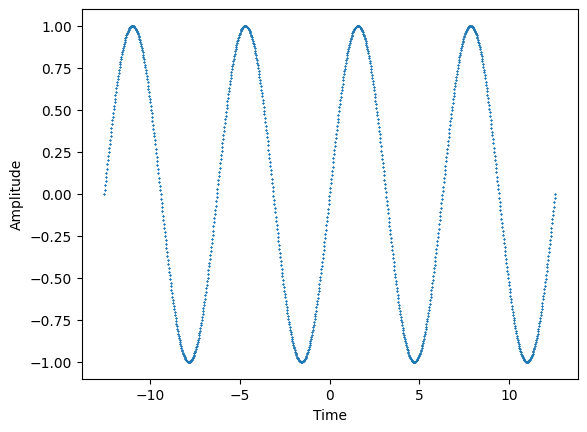

In [3]:
x = np.linspace(-4*np.pi, 4*np.pi,1000)
y = np.sin(x)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(x,y,'x',markersize=1)
#plt.savefig('highf.pdf',bbox_inches='tight')

Now let's investigate the effect of reducing sampling frequency by reducing the number of points in the plot.

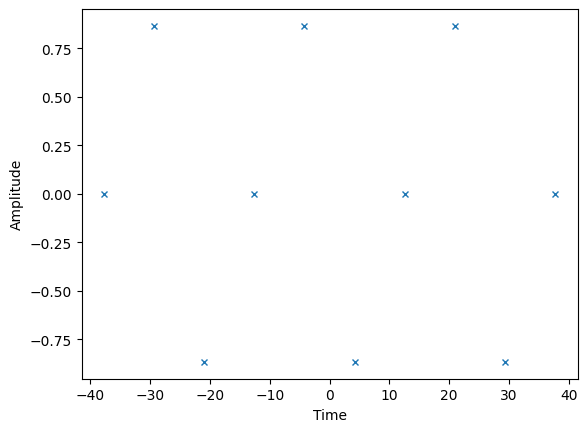

In [4]:
x = np.linspace(-12*np.pi, 12*np.pi,10)
y = np.sin(x)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(x,y,'x',markersize=5)
#plt.savefig('lowf.pdf',bbox_inches='tight')

What we notice is that the frequency can no longer be accurately determined from this plot alone. Amplitude is also lower.

Now let's Fourier transform these two arrays.

Text(0.5, 0, 'Frequency')

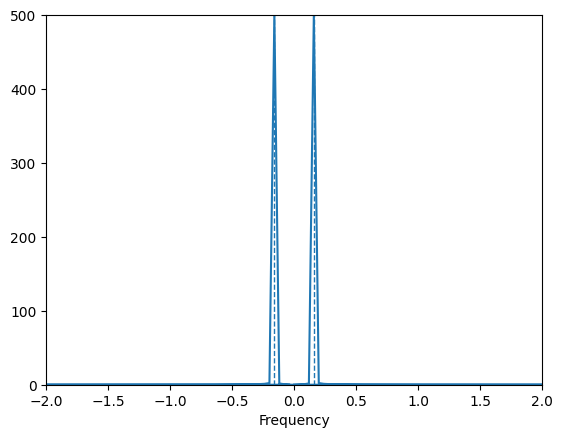

In [5]:
x = np.linspace(-4*np.pi, 4*np.pi,1000)
y = np.sin(x)

plt.plot(fftfreq(len(x), 8*np.pi/1000), np.abs(fft(y)))
plt.axvline(x = 1/(2*np.pi), linestyle="--", linewidth=1)
plt.axvline(x = -1/(2*np.pi), linestyle="--", linewidth=1)
plt.ylim([0,500])
plt.xlim([-2,2])
plt.xlabel("Frequency")

As expected, we see frequencies at $\pm\frac1{2\pi}$ where $\sin(x)$ has been regularly sampled.

Text(0.5, 0, 'Frequency')

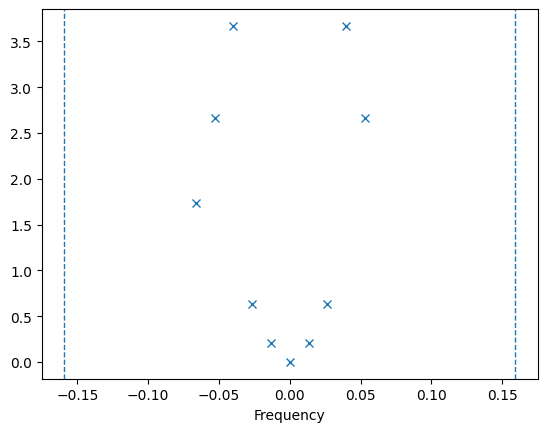

In [6]:
x = np.linspace(-12*np.pi, 12*np.pi,10)
y = np.sin(x)

plt.plot(fftfreq(len(x), 24*np.pi/10), np.abs(fft(y)), "x")
plt.axvline(x = 1/(2*np.pi), linestyle="--", linewidth=1)
plt.axvline(x = -1/(2*np.pi), linestyle="--", linewidth=1)
#plt.ylim([0,500])
#plt.xlim([-2,2])
plt.xlabel("Frequency")

Now it appears that sampling frequency is too low to properly extract the expected frequency.

### 2D Fourier Transforms

Let's create a general wave in the form $e^{i(kt-\omega t)}$ and see what happens when $k$ and $\omega$ are varied.

In [28]:
points = 100
x = np.linspace(0, 8*np.pi, points)
t = np.linspace(0,8*np.pi, points)

def wave(x,t):
    k = 1
    o = 2*np.pi
    return np.exp(1j*(k*x-o*t))

points_2d = np.empty((points,points), np.cdouble)
for i in x:
    tmp = np.empty(points, np.cdouble)
    for w in t:
        np.append(wave(i,w), tmp)
    print(tmp)
    np.append(tmp, points_2d)

#print(np.real(points_2d))
#plt.imshow(np.real(points_2d), cmap="hot")
#plt.show()

[0.00000000e+000+6.95199494e-310j 7.61355160e-321            +nanj
 1.19891632e-311+0.00000000e+000j 1.39804329e-076+1.39803697e-076j
 4.85184477e-033+1.48541334e-076j 2.00376262e-052+7.11326528e-067j
 6.01347002e-154+2.12070775e+161j 3.30883183e-033+5.20268031e-090j
 1.39736856e-076+1.21089429e-099j 3.66962227e-062+4.08404623e+179j
 3.66964230e-062+3.76430490e+179j 1.27771413e-057+9.05977905e-043j
 7.69732717e-072+4.66536608e-062j 1.56397107e-152+8.24023322e-067j
 1.30070296e-100+2.31738030e-052j 4.54845103e+203+3.05748453e-057j
 1.79339645e-052+7.26256580e-043j 1.17478576e-047+4.76072970e-038j
 1.26931438e-076+1.10817649e-047j 1.26931636e-076+3.66962158e-062j
 3.59968676e+179+5.59942977e-067j 4.08404875e+179+3.84591337e-086j
 8.15940387e-043+4.05545799e-086j 4.42702726e-062+2.46264487e-154j
 7.49697718e-067+1.30098201e-100j 2.58081136e-057+4.94113011e+203j
 1.31396126e-071+9.50111420e-043j 1.04137631e-042+4.90747779e-062j
 1.13052916e-042+1.26931700e-076j 2.31900368e-052+1.26931765e-

[0.00000000e+000+6.95199494e-310j 7.61355160e-321            +nanj
 1.19802016e-311+0.00000000e+000j 1.39804329e-076+1.39803697e-076j
 4.85184477e-033+1.48541334e-076j 2.00376262e-052+7.11326528e-067j
 6.01347002e-154+2.12070775e+161j 3.30883183e-033+5.20650796e-090j
 1.39736856e-076+1.21089429e-099j 3.66962227e-062+4.08404623e+179j
 3.66964230e-062+3.76430490e+179j 1.27771413e-057+9.05977905e-043j
 7.69732717e-072+4.66536608e-062j 1.56397107e-152+8.24023322e-067j
 1.30070296e-100+2.31738030e-052j 4.54845103e+203+3.05748453e-057j
 1.79339645e-052+7.26256580e-043j 1.17478576e-047+4.76072970e-038j
 1.26931438e-076+1.10817649e-047j 1.26931636e-076+3.66962158e-062j
 3.59968676e+179+5.59942977e-067j 4.08404875e+179+3.84591337e-086j
 8.15940387e-043+4.05545799e-086j 4.42702726e-062+2.46264487e-154j
 7.49697718e-067+1.30098201e-100j 2.58081136e-057+4.94113011e+203j
 1.31396126e-071+9.50111420e-043j 1.04137631e-042+4.90747779e-062j
 1.13052916e-042+1.26931700e-076j 2.31900368e-052+1.26931765e-

In [23]:
x = 4*np.pi
t = 4*np.pi
k = 1
o = 2*np.pi
print(np.exp(1j*(k*x-o*t)))
print(wave(x,t))

(-0.9143004684785717+0.40503660740711356j)
(-0.9143004684785717+0.40503660740711356j)
